In [1]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://results.golfstat.com/public/leaderboards/gsnav.cfm?pg=stats&tid=19276&statsType=c'
response = requests.get(url).text
soup = BeautifulSoup(response)
scores = soup.find_all('div', attrs={"style":"clear:both;;white-space:nowrap;"})

In [3]:
print(len(scores), len(scores)/4)

72 18.0


In [4]:
score_rows = []

In [5]:
for i in range(0, len(scores)):
    #print('-'*20)
    #print(scores[i].get_text())
    score_rows.append(scores[i].get_text())

In [6]:
scores_list = [score.split('\n')[1:13] for score in score_rows]

In [7]:
scores_list

[['18', '1', '4', '430', '4.70', '+0.70', '0', '2', '36', '29', '8', '5'],
 ['1', '2', '4', '430', '4.64', '+0.64', '0', '4', '40', '24', '9', '3'],
 ['10', '3', '4', '428', '4.56', '+0.56', '0', '5', '42', '18', '8', '7'],
 ['16', '4', '3', '175', '3.48', '+0.48', '0', '9', '45', '16', '8', '2'],
 ['7', '5', '4', '445', '4.47', '+0.47', '0', '7', '43', '24', '4', '2'],
 ['6', '6', '3', '190', '3.41', '+0.41', '0', '4', '44', '26', '5', '1'],
 ['5', '7', '4', '335', '4.38', '+0.38', '0', '9', '40', '24', '4', '3'],
 ['12', '8', '5', '520', '5.33', '+0.33', '0', '18', '36', '15', '9', '2'],
 ['11', '9', '3', '140', '3.30', '+0.30', '0', '6', '56', '14', '2', '2'],
 ['15', '10', '4', '450', '4.30', '+0.30', '0', '12', '49', '13', '3', '3'],
 ['3', '11', '3', '170', '3.27', '+0.27', '0', '6', '56', '14', '3', '1'],
 ['8', '12', '4', '363', '4.22', '+0.22', '0', '5', '57', '14', '2', '2'],
 ['4', '13', '4', '454', '4.21', '+0.21', '0', '5', '39', '27', '6', '3'],
 ['13', '14', '4', '375', 

In [8]:
df = pd.DataFrame(scores_list, columns= ['hole', 'rank', 'par', 'yard', 'average', 'dif', 'eagle', 'birdie', 'par',
                            'bogie', 'dbl_bogie', 'other'])

In [9]:
df = df.astype(float)

In [10]:
df

,hole,rank,par,yard,average,dif,eagle,birdie,par,bogie,dbl_bogie,other
0,18.0,1.0,4.0,430.0,4.70,0.70,0.0,2.0,36.0,29.0,8.0,5.0
1,1.0,2.0,4.0,430.0,4.64,0.64,0.0,4.0,40.0,24.0,9.0,3.0
2,10.0,3.0,4.0,428.0,4.56,0.56,0.0,5.0,42.0,18.0,8.0,7.0
3,16.0,4.0,3.0,175.0,3.48,0.48,0.0,9.0,45.0,16.0,8.0,2.0
4,7.0,5.0,4.0,445.0,4.47,0.47,0.0,7.0,43.0,24.0,4.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
67,14.0,14.0,4.0,415.0,4.16,0.16,0.0,16.0,39.0,22.0,2.0,1.0
68,2.0,15.0,5.0,555.0,5.09,0.09,0.0,18.0,42.0,16.0,3.0,1.0
69,9.0,16.0,5.0,525.0,5.04,0.04,1.0,24.0,36.0,14.0,2.0,3.0
70,17.0,17.0,5.0,477.0,4.91,-0.09,0.0,22.0,45.0,11.0,2.0,0.0


In [11]:
df.to_csv('mainDF')

In [9]:
df_totalRd1 = df[0:18]
df_totalRd2 = df[18:36]
df_Rd1 = df[36:54]
df_Rd2 = df[54:]

In [20]:
df_totalRd1.to_csv('totalRd1')

In [10]:
df_totalRd1

,hole,rank,par,yard,average,dif,eagle,birdie,par,bogie,dbl_bogie,other
0,18.0,1.0,4.0,430.0,4.70,0.70,0.0,2.0,36.0,29.0,8.0,5.0
1,1.0,2.0,4.0,430.0,4.64,0.64,0.0,4.0,40.0,24.0,9.0,3.0
2,10.0,3.0,4.0,428.0,4.56,0.56,0.0,5.0,42.0,18.0,8.0,7.0
3,16.0,4.0,3.0,175.0,3.48,0.48,0.0,9.0,45.0,16.0,8.0,2.0
4,7.0,5.0,4.0,445.0,4.47,0.47,0.0,7.0,43.0,24.0,4.0,2.0
5,6.0,6.0,3.0,190.0,3.41,0.41,0.0,4.0,44.0,26.0,5.0,1.0
6,5.0,7.0,4.0,335.0,4.38,0.38,0.0,9.0,40.0,24.0,4.0,3.0
7,12.0,8.0,5.0,520.0,5.33,0.33,0.0,18.0,36.0,15.0,9.0,2.0
8,11.0,9.0,3.0,140.0,3.30,0.30,0.0,6.0,56.0,14.0,2.0,2.0
9,15.0,10.0,4.0,450.0,4.30,0.30,0.0,12.0,49.0,13.0,3.0,3.0


In [21]:
df_totalRd2.to_csv('totalRd2')

In [11]:
df_totalRd2

,hole,rank,par,yard,average,dif,eagle,birdie,par,bogie,dbl_bogie,other
18,18.0,1.0,4.0,430.0,4.70,0.70,0.0,4.0,42.0,24.0,5.0,5.0
19,1.0,2.0,4.0,430.0,4.64,0.64,0.0,4.0,38.0,27.0,5.0,6.0
20,10.0,3.0,4.0,428.0,4.56,0.56,0.0,7.0,43.0,19.0,8.0,3.0
21,16.0,4.0,3.0,175.0,3.48,0.48,0.0,5.0,43.0,17.0,11.0,4.0
22,7.0,5.0,4.0,445.0,4.47,0.47,0.0,8.0,34.0,28.0,8.0,2.0
23,6.0,6.0,3.0,190.0,3.41,0.41,0.0,5.0,46.0,24.0,4.0,1.0
24,5.0,7.0,4.0,335.0,4.38,0.38,0.0,6.0,45.0,24.0,5.0,0.0
25,12.0,8.0,5.0,520.0,5.33,0.33,1.0,15.0,37.0,15.0,7.0,5.0
26,11.0,9.0,3.0,140.0,3.30,0.30,0.0,7.0,44.0,23.0,4.0,2.0
27,15.0,10.0,4.0,450.0,4.30,0.30,0.0,3.0,56.0,15.0,5.0,1.0


In [22]:
df_Rd1.to_csv('Rd1')

In [12]:
df_Rd1

,hole,rank,par,yard,average,dif,eagle,birdie,par,bogie,dbl_bogie,other
36,18.0,1.0,4.0,430.0,4.83,0.83,0.0,2.0,36.0,29.0,8.0,5.0
37,1.0,2.0,4.0,430.0,4.64,0.64,0.0,4.0,40.0,24.0,9.0,3.0
38,10.0,3.0,4.0,428.0,4.63,0.63,0.0,5.0,42.0,18.0,8.0,7.0
39,4.0,4.0,4.0,454.0,4.54,0.54,0.0,5.0,39.0,27.0,6.0,3.0
40,6.0,5.0,3.0,190.0,3.44,0.44,0.0,4.0,44.0,26.0,5.0,1.0
41,7.0,6.0,4.0,445.0,4.41,0.41,0.0,7.0,43.0,24.0,4.0,2.0
42,5.0,7.0,4.0,335.0,4.40,0.40,0.0,9.0,40.0,24.0,4.0,3.0
43,16.0,8.0,3.0,175.0,3.36,0.36,0.0,9.0,45.0,16.0,8.0,2.0
44,15.0,9.0,4.0,450.0,4.29,0.29,0.0,12.0,49.0,13.0,3.0,3.0
45,12.0,10.0,5.0,520.0,5.28,0.28,0.0,18.0,36.0,15.0,9.0,2.0


In [23]:
df_Rd2.to_csv('Rd2')

In [13]:
df_Rd2

,hole,rank,par,yard,average,dif,eagle,birdie,par,bogie,dbl_bogie,other
54,1.0,1.0,4.0,430.0,4.65,0.65,0.0,4.0,38.0,27.0,5.0,6.0
55,16.0,2.0,3.0,175.0,3.59,0.59,0.0,5.0,43.0,17.0,11.0,4.0
56,18.0,3.0,4.0,430.0,4.58,0.58,0.0,4.0,42.0,24.0,5.0,5.0
57,7.0,4.0,4.0,445.0,4.54,0.54,0.0,8.0,34.0,28.0,8.0,2.0
58,10.0,5.0,4.0,428.0,4.50,0.50,0.0,7.0,43.0,19.0,8.0,3.0
59,6.0,6.0,3.0,190.0,3.39,0.39,0.0,5.0,46.0,24.0,4.0,1.0
60,12.0,7.0,5.0,520.0,5.39,0.39,1.0,15.0,37.0,15.0,7.0,5.0
61,11.0,8.0,3.0,140.0,3.38,0.38,0.0,7.0,44.0,23.0,4.0,2.0
62,5.0,9.0,4.0,335.0,4.35,0.35,0.0,6.0,45.0,24.0,5.0,0.0
63,15.0,10.0,4.0,450.0,4.31,0.31,0.0,3.0,56.0,15.0,5.0,1.0


In [14]:
df_Rd2['hole'].values

array([ 1., 16., 18.,  7., 10.,  6., 12., 11.,  5., 15.,  3.,  8., 13.,
       14.,  2.,  9., 17.,  4.])

<AxesSubplot:xlabel='hole', ylabel='dif'>

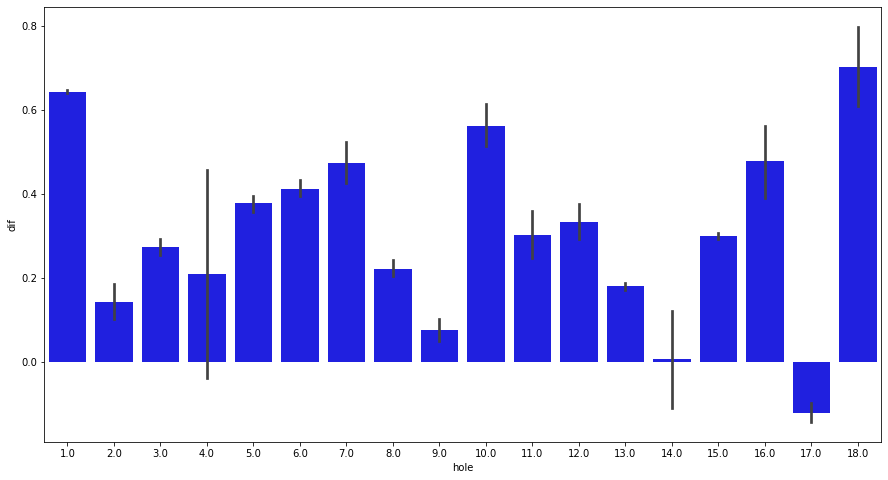

In [15]:
plt.figure(figsize=(15,8))
sns.barplot(x=df.hole , y=df.dif, color='blue')

In [17]:
df.describe()

,hole,rank,par,yard,average,dif,eagle,birdie,par,bogie,dbl_bogie,other
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.500000,9.500000,4.000000,374.500000,4.309722,0.309722,0.222222,10.694444,43.861111,18.083333,4.861111,2.277778
std,5.224536,5.224536,0.671345,128.821418,0.619927,0.223481,0.632950,7.668555,6.548423,6.020505,2.433947,1.671823
min,1.000000,1.000000,3.000000,140.000000,3.230000,-0.150000,0.000000,2.000000,34.000000,7.000000,1.000000,0.000000
25%,5.000000,5.000000,4.000000,301.000000,3.977500,0.180000,0.000000,5.000000,39.000000,14.000000,3.000000,1.000000
50%,9.500000,9.500000,4.000000,428.000000,4.365000,0.300000,0.000000,7.500000,43.000000,16.000000,5.000000,2.000000
75%,14.000000,14.000000,4.000000,451.000000,4.700000,0.470000,0.000000,15.250000,46.750000,24.000000,6.250000,3.000000
max,18.000000,18.000000,5.000000,555.000000,5.390000,0.830000,3.000000,30.000000,57.000000,29.000000,11.000000,7.000000
